In [1]:
from pymopt.solid import SolidPlateModel

from scipy import stats
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks", {'grid.linestyle': '--'})
import warnings
warnings.filterwarnings('ignore')

In [2]:
def radialDistance(p,w,nn,dr):
    alpha = np.array([(i)*dr for i in range(nn+1)])
    da = np.array([2*np.pi*(i+0.5)*dr**2 for i in range(nn)])
    r = np.sqrt(p[0]**2+p[1]**2)
    Rdr = []
    for i in range(nn):
        index = np.where((alpha[i]<r)&(alpha[i+1]>=r))[0]
        Rdr.append(w[index].sum())
    Rdr = np.array(Rdr)/(da*nPh)
    return alpha[:-1],Rdr

def AngularyResolved(v,w,nn):
    da = np.pi/(2*nn)
    alpha = np.array([(i+0.5)*da for i in range(nn+1)])
    alpha2 = np.array([(i)*da for i in range(nn+1)])
    do = 4*np.pi*np.sin(alpha)*np.sin(da/2)
    at = np.arccos(np.sign(v[2])*(v[2]))
    Rda = []
    for i in range(nn):
        index = np.where((alpha2[i]<at)&(alpha2[i+1]>=at))[0]
        Rda.append(w[index].sum())
    Rda = np.array(Rda)/(do[:-1]*nPh)
    return alpha[:-1],Rda

# Computation Results of single-solidmodel and mcml

## Total diffuse reflectance and total transmittance

### slab of turbid medium

In [3]:
nPh = 5000
model = SolidPlateModel(nPh = nPh)
params = {
    'thickness':[0.02],
    'ms':[90],
    'ma':[10],
    'g':[0.75],
    'n':[1.],
    'n_air':1.,
}
Rd=[];Tt=[]
for i in range(10):
    model = SolidPlateModel(nPh = nPh)
    model.built(**params)
    model = model.start()
    RdTt = model.getRdTtValues()
    Rd.append(RdTt['Rd'])
    Tt.append(RdTt['Tt'])



###### Start ######

Progress: 34.6 [％]
Calculation time: 0 minutes 0 seconds.

Progress: 69.98 [％]
Calculation time: 0 minutes 0 seconds.

Progress: 91.84 [％]
Calculation time: 0 minutes 0 seconds.

Progress: 99.36 [％]
Calculation time: 0 minutes 0 seconds.


###### Finish ######
Maximum step number: 31
######
Mean Rd 0.096818
Mean Tt 0.659577

Calculation time: 0 minutes 0 seconds.

###### Start ######

Progress: 35.9 [％]
Calculation time: 0 minutes 0 seconds.

Progress: 69.38 [％]
Calculation time: 0 minutes 0 seconds.

Progress: 92.04 [％]
Calculation time: 0 minutes 0 seconds.

Progress: 99.3 [％]
Calculation time: 0 minutes 0 seconds.


###### Finish ######
Maximum step number: 27
######
Mean Rd 0.099780
Mean Tt 0.657493

Calculation time: 0 minutes 0 seconds.

###### Start ######

Progress: 36.12 [％]
Calculation time: 0 minutes 0 seconds.

Progress: 70.1 [％]
Calculation time: 0 minutes 0 seconds.

Progress: 92.06 [％]
Calculation time: 0 minutes 0 seconds.

Progress: 99.2 [％]
Calcu

In [4]:
print('Mean Rd %0.6f, sd_error %0.6f'%(np.mean(Rd),np.std(Rd)/np.sqrt(len(Rd))))
print('Mean Tt %0.6f, sd_error %0.6f'%(np.mean(Tt),np.std(Tt)/np.sqrt(len(Tt))))

Mean Rd 0.097724, sd_error 0.000958
Mean Tt 0.661020, sd_error 0.001515


### Semi-infinite turbid medium that has mismatched refractive index with the ambient medium

In [5]:
nPh = 5000
params = {
    'thickness':[10],
    'ms':[90],
    'ma':[10],
    'g':[0.],
    'n':[1.5],
    'n_air':1.,
}
Rd=[];Tt=[]
for i in range(10):
    model = SolidPlateModel(nPh = nPh)
    model.built(**params)
    model = model.start()
    RdTt = model.getRdTtValues()
    Rd.append(RdTt['Rd'])
    Tt.append(RdTt['Tt'])



###### Start ######

Progress: 5.06 [％]
Calculation time: 0 minutes 0 seconds.

Progress: 12.14 [％]
Calculation time: 0 minutes 0 seconds.

Progress: 22.62 [％]
Calculation time: 0 minutes 0 seconds.

Progress: 35.6 [％]
Calculation time: 0 minutes 0 seconds.

Progress: 49.4 [％]
Calculation time: 0 minutes 0 seconds.

Progress: 62.12 [％]
Calculation time: 0 minutes 0 seconds.

Progress: 99.8 [％]
Calculation time: 0 minutes 0 seconds.


###### Finish ######
Maximum step number: 153
######
Mean Rd 0.217937
Mean Tt 0.000000

Calculation time: 0 minutes 0 seconds.

###### Start ######

Progress: 5.58 [％]
Calculation time: 0 minutes 0 seconds.

Progress: 12.98 [％]
Calculation time: 0 minutes 0 seconds.

Progress: 23.88 [％]
Calculation time: 0 minutes 0 seconds.

Progress: 37.34 [％]
Calculation time: 0 minutes 0 seconds.

Progress: 50.26 [％]
Calculation time: 0 minutes 0 seconds.

Progress: 62.68 [％]
Calculation time: 0 minutes 0 seconds.

Progress: 99.66 [％]
Calculation time: 0 minutes 0 sec

In [6]:
print('Mean Rd %0.6f, sd_error %0.6f'%(np.mean(Rd),np.std(Rd)/np.sqrt(len(Rd))))
print('Mean Tt %0.6f, sd_error %0.6f'%(np.mean(Tt),np.std(Tt)/np.sqrt(len(Tt))))

Mean Rd 0.220971, sd_error 0.001212
Mean Tt 0.000000, sd_error 0.000000


## Angularly resolved diffuse reflectance and transmittance

In [7]:
nPh = 500000
model = SolidPlateModel(nPh = nPh)
params = {
    'thickness':[0.02],
    'ms':[90],
    'ma':[10],
    'g':[0.75],
    'n':[1.],
    'n_air':1.,
}
model.built(**params)
model = model.start()


###### Start ######

Progress: 36.128 [％]
Calculation time: 0 minutes 0 seconds.

Progress: 70.196 [％]
Calculation time: 0 minutes 1 seconds.

Progress: 91.89 [％]
Calculation time: 0 minutes 1 seconds.

Progress: 99.188 [％]
Calculation time: 0 minutes 1 seconds.

Progress: 99.992 [％]
Calculation time: 0 minutes 1 seconds.


###### Finish ######
Maximum step number: 45
######
Mean Rd 0.097484
Mean Tt 0.661164

Calculation time: 0 minutes 2 seconds.


In [8]:
rez = model.getResult()
v_result = rez["v"]
w_result = rez["w"]
Tt_index = np.where(v_result[2]>0)[0]
Rd_index = np.where(v_result[2]<0)[0]

Trancemittance


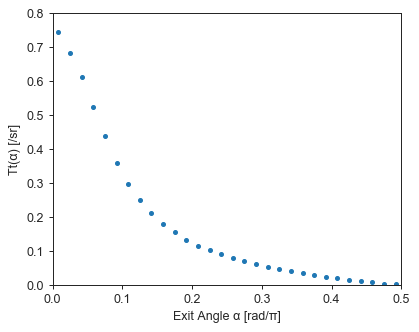

In [9]:
print('Trancemittance')
nn = 30
alpha,Tta = AngularyResolved(v_result[:,Tt_index],w_result[Tt_index],nn)

plt.figure(figsize=(5,4),dpi=90)
plt.plot(alpha/np.pi,Tta,'.')
plt.xlabel('Exit Angle α [rad/π]')
plt.ylabel('Tt(α) [/sr]')
plt.xlim(0,0.5)
plt.ylim(0,0.8)
plt.show()

Refrected


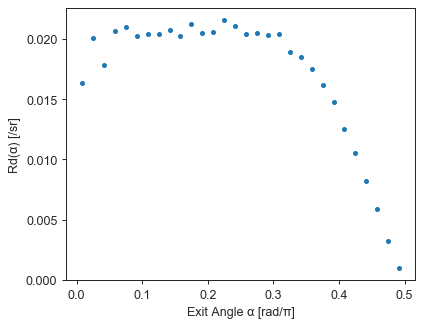

In [10]:
print('Refrected')
nn = 30
alpha,Rda = AngularyResolved(v_result[:,Rd_index],w_result[Rd_index],nn)

plt.figure(figsize=(5,4),dpi=90)
plt.plot(alpha/np.pi,Rda,'.')
plt.xlabel('Exit Angle α [rad/π]')
plt.ylabel('Rd(α) [/sr]')
#plt.xlim(0,0.5)
#plt.ylim(0,0.025)
plt.show()

In [11]:
df_ = pa.DataFrame(np.array([alpha/np.pi,Rda,Tta]).T,columns = ['Angle','Rd','Tt'])
df_.to_csv('result/solid_angle.csv',index=None)

## Radially resolved diffuse reflectance

In [12]:
nPh = 1000000

params = {
    'thickness':[20],
    'ms':[100],
    'ma':[0.1],
    'g':[0.9],
    'n':[1.],
    'n_air':1.,
}
model = SolidPlateModel(nPh = nPh)
model.built(**params)
model = model.start()


###### Start ######

Progress: 0.595 [％]
Calculation time: 0 minutes 1 seconds.

Progress: 1.956 [％]
Calculation time: 0 minutes 2 seconds.

Progress: 5.035 [％]
Calculation time: 0 minutes 5 seconds.

Progress: 11.933 [％]
Calculation time: 0 minutes 10 seconds.

Progress: 24.748 [％]
Calculation time: 0 minutes 19 seconds.

Progress: 41.018 [％]
Calculation time: 0 minutes 34 seconds.

Progress: 56.099 [％]
Calculation time: 0 minutes 56 seconds.

Progress: 68.156 [％]
Calculation time: 1 minutes 29 seconds.

Progress: 77.162 [％]
Calculation time: 2 minutes 15 seconds.

Progress: 83.73 [％]
Calculation time: 3 minutes 18 seconds.

Progress: 88.457 [％]
Calculation time: 4 minutes 47 seconds.

Progress: 91.823 [％]
Calculation time: 6 minutes 51 seconds.

Progress: 94.226 [％]
Calculation time: 9 minutes 53 seconds.

Progress: 99.999 [％]
Calculation time: 11 minutes 3 seconds.

Progress: 100.0 [％]
Calculation time: 11 minutes 36 seconds.

Progress: 100.0 [％]
Calculation time: 12 minutes 42 sec

KeyboardInterrupt: 

In [ ]:

params = {
    'thickness':[20],
    'ms':[10],
    'ma':[0.1],
    'g':[0.],
    'n':[1.],
    'n_air':1.,
}
model = SolidPlateModel(nPh = nPh)
model.built(**params)
model = model.start()

In [ ]:
nn = 200
dr = 0.005

rezB = model.getResult()
p_resultB = rezB["p"]
v_resultB = rezB["v"]
w_resultB = rezB["w"]
Tt_indexB = np.where(v_resultB[2]>0)[0]
Rd_indexB = np.where(v_resultB[2]<0)[0]

alphaA,RdrA = radialDistance(p_resultA[:,Rd_indexA],w_resultA[Rd_indexA],nn,dr)
alphaB,RdrB = radialDistance(p_resultB[:,Rd_indexB],w_resultB[Rd_indexB],nn,dr)

In [ ]:

plt.figure(figsize=(5,4),dpi=90)
plt.plot(alphaA,RdrA,'-',c = 'red',label = 'A: g = 0.9')
plt.plot(alphaB,RdrB,'-',c = 'blue',label = "B: g = 0.0")
plt.yscale('log')
plt.xlim(0,1)
plt.legend()
plt.xlabel('r [cm]')
plt.ylabel('Rd $[cm^{-2}]$')
plt.show()

In [ ]:
plt.figure(figsize=(5,4),dpi=90)
plt.plot(alphaA,(RdrB-RdrA)/RdrA,'-',c = 'red',label = '(B-A) / A')
plt.xlim(0,1)
plt.ylim(-0.5,2)
plt.legend()
plt.xlabel('r [cm]')
plt.ylabel('Relative Error')
plt.show()

In [ ]:
df_ = pa.DataFrame(np.array([alphaA,RdrA,RdrB]).T,columns = ['r cm','A_Rd','B_Rd'])
df_.to_csv('result/solid_equivalent.csv',index=None)

## Depth resolved internal fluence

In [ ]:
model_params = {
    'nPh': 1000000,
    'fluence': True,
    'nr': 500,
    'nz': 200,
    'dr': 0.01,
    'dz': 0.01,
}

print("######  n = 1.  ######")
params = {
    'thickness':[200],
    'ms':[100],
    'ma':[0.1],
    'g':[0.9],
    'n':[1.],
    'n_air':1.,
}
model = SolidPlateModel(**model_params)
model.built(**params)
model = model.start()
fluenceA = model.getFluence()

print('')
print("######  n = 1.37  ######")
params = {
    'thickness':[200],
    'ms':[100],
    'ma':[0.1],
    'g':[0.9],
    'n':[1.37],
    'n_air':1.,
}
model = SolidPlateModel(**model_params)
model.built(**params)
model = model.start()
fluenceB = model.getFluence()

In [ ]:
da = np.array([2*np.pi*(i+0.5)*model_params['dr']**2 for i in range(model_params['nr'])])
aaa = params['ma'][0]*model_params['nPh']*model_params['dz']
phi_zA = (fluenceA["Arz"].T/aaa).T.sum(0)
phi_zB = (fluenceB["Arz"].T/aaa).T.sum(0)

plt.figure(figsize=(5,4),dpi=100)
plt.plot(fluenceA["z"],phi_zA,c = 'red',label = 'n = 1.0')
plt.plot(fluenceB["z"],phi_zB,c = 'blue',label = 'n = 1.37')
plt.xlabel('Z [cm]')
plt.ylabel('Fluence [-]')
plt.legend()
plt.yscale('log')
plt.xlim(0,1)
plt.ylim(0.5,10)
plt.show()

In [ ]:
df_ = pa.DataFrame(np.array([fluence.getArrayZ(),phi_zA,phi_zB]).T,columns = ['z cm','n_1','n_1.37'])
df_.to_csv('result/solid_fluence_z.csv',index=None)

# Multi-layered Tissues

## Refrective and transmittnace rate

In [ ]:
nPh = 1000000
params = {
    'thickness':[0.1,0.1,0.2],
    'ms':[100,10,10],
    'ma':[1,1,2],
    'g':[0.9,0,0.7],
    'n':[1.37,1.37,1.37],
    'n_air':1.,
}
model = SolidPlateModel(nPh = nPh)
model.built(**params)
model = model.start()

In [ ]:
rez = model.getResult()
p_result = rez["p"]
v_result = rez["v"]
w_result = rez["w"]

Tt_index = np.where(v_result[2]>0)[0]
Rd_index = np.where(v_result[2]<0)[0]

In [ ]:
nn = 100
dr = 0.005

alphaRd,Rd = radialDistance(p_result[:,Rd_index],w_result[Rd_index],nn,dr)
alphaTt,Tt = radialDistance(p_result[:,Tt_index],w_result[Tt_index],nn,dr)

plt.figure(figsize=(5,4),dpi=100)
plt.plot(alphaRd,Rd,'-',c = 'red')
plt.yscale('log')
plt.xlim(0,0.5)
plt.ylim(10**-2,10**2)
plt.xlabel('r [cm]')
plt.ylabel('Rd $[cm^{-2}]$')
plt.show()

plt.figure(figsize=(5,4),dpi=100)
plt.plot(alphaTt,Tt,'-',c = 'blue')
plt.yscale('log')
plt.xlim(0,0.5)
plt.ylim(10**-2,1)
plt.xlabel('r [cm]')
plt.ylabel('Tt $[cm^{-2}]$')
plt.show()

In [ ]:
df_ = pa.DataFrame(np.array([alphaRd,Rd,Tt]).T,columns = ['r cm','Rd','Tt'])
df_.to_csv('result/solid_multi_rt_test.csv',index=None)